In [1]:
from competing_methods.tree_based_estimators import tree_based_estimators_
from data_loader import data_loader_
from utils.utils_ import plot_survival_curves
from prettytable import PrettyTable
from time import time
import numpy as np

R[write to console]: Le chargement a nécessité le package : nlme

R[write to console]: Le chargement a nécessité le package : survival



/Users/acsi/Working/RF_survival/Implementations/wildwood_survival/wildwood_survival


R[write to console]: Le chargement a nécessité le package : doParallel

R[write to console]: Le chargement a nécessité le package : foreach

R[write to console]: Le chargement a nécessité le package : iterators

R[write to console]: Le chargement a nécessité le package : parallel

R[write to console]: Le chargement a nécessité le package : rstan

R[write to console]: Le chargement a nécessité le package : StanHeaders

R[write to console]: Le chargement a nécessité le package : ggplot2

R[write to console]: rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

R[write to console]: For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



### Dataset

Level of censoring of GBSG is 56.4 %


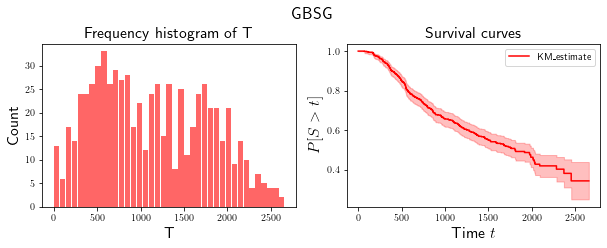

Level of censoring of PBCSeq is 55.1 %


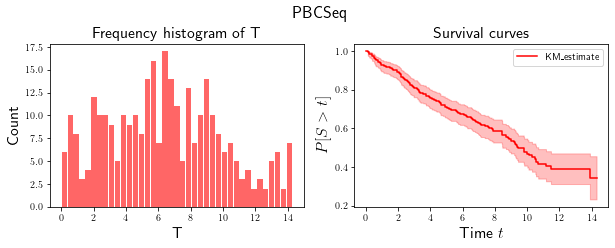

Level of censoring of simple_simulated_data is 0.0 %


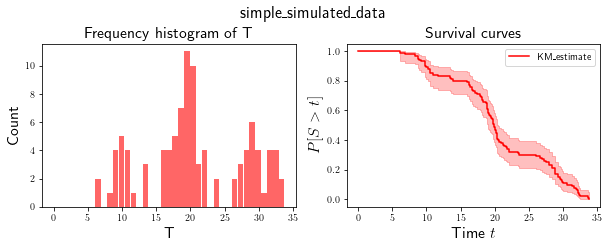

Level of censoring of linear_simulated_data is 12.1 %


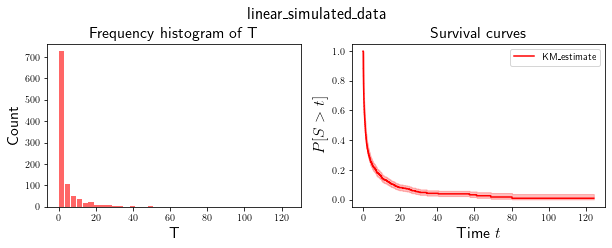

Level of censoring of non_linear_simulated_data is 18.9 %


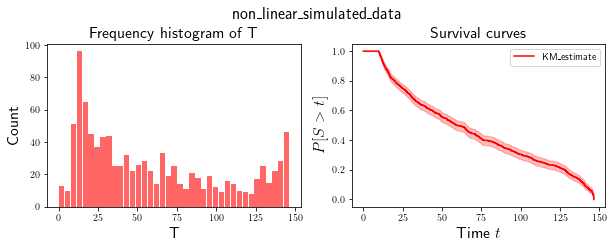

In [3]:
data_list = ["GBSG", "PBCSeq", "simple_simulated_data", "linear_simulated_data", "non_linear_simulated_data"]
datas = data_loader_.load_data(data_list)
for data in data_list:
    (X, y) = datas[data]
    delta = y['indicator'].astype(np.ushort)
    print("Level of censoring of {} is {:.1f} %".format(data, 100 * (1 - (delta.sum() / len(delta)))))
    plot_survival_curves(y['indicator'].astype(np.ushort), y['time'], data)

### Modeling

In [4]:
pt = PrettyTable(['Data', 'Algos', 'C_index', 'time'])
estimators_name = ["SurvivalTree", "RSF", "GBSA"]
estimators = tree_based_estimators_(estimators_name, max_depth = 2, 
                                    min_samples_leaf = 10, n_estimators = 10)
for data in data_list:
    (X, y) = datas[data]
    idx = 0
    for name, estimator in estimators.items():
        start = time()
        estimator_ = estimator.fit(X, y)
        C_index = estimator_.score(X, y)
        if idx == (len(estimators) // 2):
            pt.add_row([data, name, "%.3f" % C_index, "%.3f" % (time() - start)])
        else:
            pt.add_row(["", name, "%.3f" % C_index, "%.3f" % (time() - start)])
        idx += 1
    pt.add_row(["", "", "", ""])

print(pt)

+---------------------------+--------------+---------+--------+
|            Data           |    Algos     | C_index |  time  |
+---------------------------+--------------+---------+--------+
|                           | SurvivalTree |  0.650  | 0.064  |
|            GBSG           |     RSF      |  0.871  | 0.151  |
|                           |     GBSA     |  0.719  | 0.081  |
|                           |              |         |        |
|                           | SurvivalTree |  0.637  | 0.012  |
|           PBCSeq          |     RSF      |  0.789  | 0.039  |
|                           |     GBSA     |  0.678  | 0.018  |
|                           |              |         |        |
|                           | SurvivalTree |  0.816  | 0.004  |
|   simple_simulated_data   |     RSF      |  0.883  | 0.015  |
|                           |     GBSA     |  0.873  | 0.006  |
|                           |              |         |        |
|                           | SurvivalTr